In [2]:
# remember to pip install any of these that you need. seaborn and pingouin, I think, right?

import pandas as pd
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Experiment 1

In [3]:
df_Ex1 = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Notebooks/ANOVA/data_Experiment_1.csv')
#df_Ex1 = df_Ex1[df_Ex1['duration'] < 1296.708]
df_Ex1.head()

,Unnamed: 0,ID,sender,duration,prime,target,condition,soa_condition,congruence,correct,frequency_target
0,0,2215,target,865.791,paint,PAINT,Con_Synth,short,congruent,True,3.2737
1,3,2215,target,710.994,fern,PETAL,Inc_Nat_Nat,short,incongruent,True,1.6628
2,4,2215,target,598.582,tiger,TIGER,Con_Nat,short,congruent,True,2.9759
3,6,2215,target,614.026,frog,FROG,Con_Nat,short,congruent,True,2.7810
4,7,2215,target,756.676,peach,SHED,Inc_Nat_Synth,short,incongruent,True,2.7490


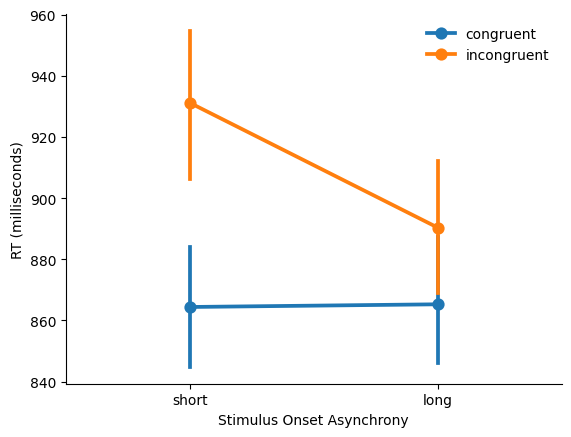

In [4]:
ax = sns.pointplot(data = df_Ex1, x = 'soa_condition', y = 'duration', hue = 'congruence')  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()

In [5]:
# aggregate the data to get the mean
df_Ex1_agg = df_Ex1.groupby(['ID', 'congruence', 'soa_condition'])['duration'].mean().reset_index()    # get aggregated data (RT means per participant per condition)
df_Ex1_agg

,ID,congruence,soa_condition,duration
0,2181,congruent,long,739.411231
1,2181,congruent,short,716.535808
2,2181,incongruent,long,690.155261
3,2181,incongruent,short,758.190714
4,2182,congruent,long,777.133417
...,...,...,...,...
121,2214,incongruent,short,696.890350
122,2215,congruent,long,657.766692
123,2215,congruent,short,800.824318
124,2215,incongruent,long,710.101125


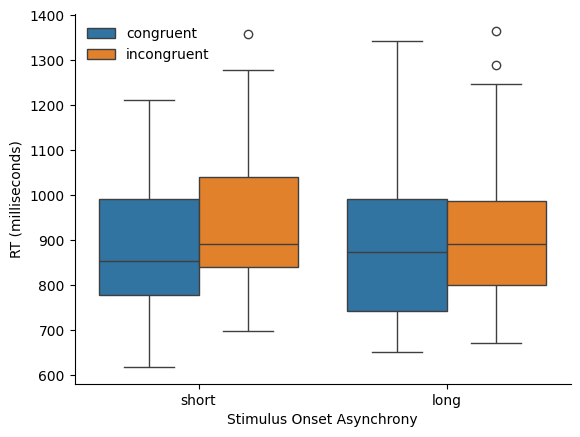

In [6]:
order = ['short', 'long']  
ax = sns.boxplot(data = df_Ex1_agg, x = 'soa_condition', y = 'duration', hue = 'congruence', order=order)  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()   

In [ ]:
# outliers, but it might be superfluous since the outliers are only three datapoints and it's hard to determine a cut-off point
Q1 = df_Ex1_agg['duration'].quantile(0.25)
Q3 = df_Ex1_agg['duration'].quantile(0.75)
    
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('Outliers:', Q1 - (1.5 * IQR), Q3 + (1.5 * IQR))

In [11]:

short_cong = df_Ex1_agg.loc[((df_Ex1_agg['soa_condition'] == 'short') & (df_Ex1_agg['congruence'] == 'congruent'))]['duration']
short_incong = df_Ex1_agg.loc[((df_Ex1_agg['soa_condition'] == 'short') & (df_Ex1_agg['congruence'] == 'incongruent'))]['duration']

# tip or = |, and = &
# (put first thing in with parentheses)|(put second thin in )

print('congruent:', short_cong.mean())
print('incongruent:', short_incong.mean())
print('difference:', short_incong.mean() - short_cong.mean())

pg.ttest(short_cong, short_incong, paired=True)


congruent: 871.2120803324187
incongruent: 945.1848620830319
difference: 73.9727817506132


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.184775,31,two-sided,0.000218,"[-110.02, -37.92]",0.4931,126.741,0.770995


dof = degrees of freedom, number of participants-1, had we fogotten to aggregate the data dof would have been very high. often choose p-value cut-off at 0.05

|             |keep $H_{0}$ |reject $H_{0}$ |
|-------------|-------------|---------------|
|$H_{0}$ True |keep $H_{0}$ |type I error   |
|$H_{0}$ False|type II error|reject $H_{0}$ |

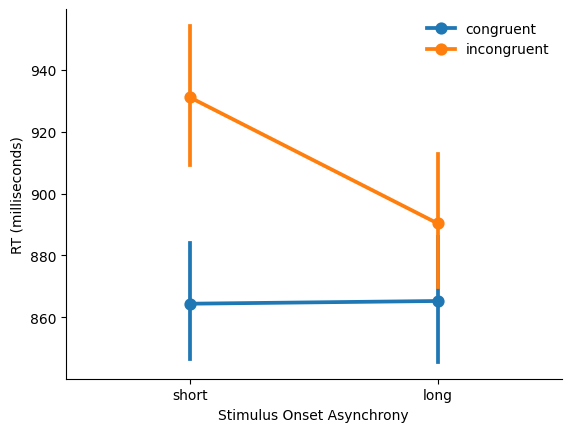

In [12]:
ax = sns.pointplot(data = df_Ex1, x = 'soa_condition', y = 'duration', hue = 'congruence')  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()

In [22]:
# Family-wise error rate, when doing two comparison with a 5% risk it adds up to a 10% risk

alpha = 0.05
number_of_compairisons = 1

fwer = 1-((1-alpha)**number_of_compairisons)
print('Family-wise error rate:', round(fwer, 4))

Family-wise error rate: 0.05


In [23]:
# Repeated-measures ANOVA --> comparing everything all at once 
# main effect take all shor tdata points and compare with long datapoints
# p-value = p-unc
# Note! pg.rm_anova wants the FULL dataset, not the aggregated one!

pg.rm_anova(data=df_Ex1, dv='duration', within=['congruence', 'soa_condition'], subject='ID').round(2)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruence,67971.85,1,30,67971.85,20.00,0.00,0.00,0.02,1.0
1,soa_condition,335.66,1,30,335.66,0.04,0.84,0.84,0.00,1.0
2,congruence * soa_condition,17755.46,1,30,17755.46,3.13,0.09,0.09,0.01,1.0


We conducted a repeated-measures 2-way analysis of variance. There was a significant main effect of congruence (F(1,30) = 12.18, p = 0.0001). There was no main effect of soa length (F(1,30) = 0.23, p = 0.63). There was a significant interaction between congruence and soa length (F(1,30 = 8.26, p = 0.01)).

**congruency**
| |+|-|
|----------|-|-|
|short| | |
|long | | |

# Experiment 2

In [25]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
df_Ex2 = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Notebooks/ANOVA/data_Experiment_2.csv')
df_Ex2.head()

,Unnamed: 0,url,sender,sender_type,sender_id,response,response_action,ended_on,duration,time_run,...,timestamp,time_switch,counterbalance,Unnamed: 17,stim,condition,block,correct_response,correctResponse,correct
0,0,2252,Instructions1,canvas.Screen,0,NaN,keypress,response,4679.644,10931.9,...,2023-10-05T12:39:22.095Z,15646.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2252,Instructions2,canvas.Screen,1,NaN,keypress,response,5033.217,15641.1,...,2023-10-05T12:39:27.136Z,20685.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2252,Instructions3,canvas.Screen,2,NaN,keypress,response,3670.538,20681.5,...,2023-10-05T12:39:30.811Z,24372.782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2252,Instructions4,canvas.Screen,3,NaN,keypress,response,5168.818,24356.8,...,2023-10-05T12:39:35.998Z,29567.617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2252,Instructions5,canvas.Screen,4,NaN,keypress,response,3231.283,29543.4,...,2023-10-05T12:39:39.255Z,32815.263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# some preprocessing

df = df_Ex2[df_Ex2['sender'] == 'Stimulus']                         # get only rows with RT data
df = df[df['correct'] == True]                                      # get only correct responses

data = df[['sender', 'url', 'duration', 'condition']].copy()        # get only the columns we need

data = data[data['condition'] != 'Filler']                          # remove filler trials

data = data[data['duration'] < 2000]                                # remove outliers

data_agg = data.groupby(['url', 'condition'])['duration'].mean().reset_index()    # get aggregated data (RT means per participant per condition)


data_agg.head()

,url,condition,duration
0,2225,Nonword,704.715200
1,2225,Related,598.352455
2,2225,Unrelated,757.481125
3,2226,Nonword,619.521941
4,2226,Related,604.011217


<Axes: xlabel='condition', ylabel='duration'>

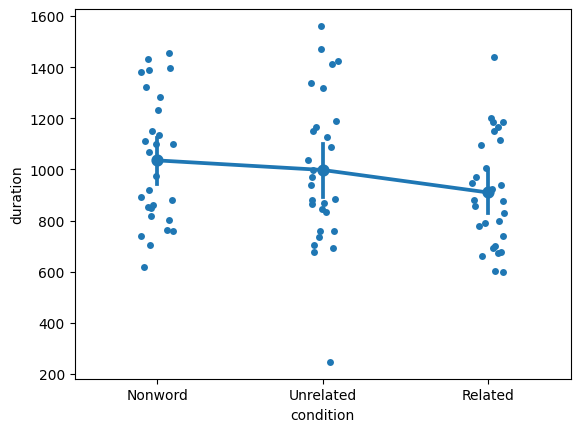

In [29]:
# plot the data

order = ['Nonword', 'Unrelated', 'Related']
sns.pointplot(data = data_agg, x='condition', y = 'duration', order=order)
sns.stripplot(data = data_agg, x='condition', y = 'duration', order=order)

dependent variable: the y-axis, duration, 
independent variable: the x-axis


In [30]:
# remember, pingouin wants the full dataset for ANOVA
# there is a significantdifference btut since it's ANOVa it doesn't tell us where the difference is
#pg.rm_anova(data = XXX, dv = XXX, within = XXX, subject = XXX)
pg.rm_anova(data = data, dv = "duration", within = ['condition'], subject = 'url')

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,condition,2,54,5.082738,0.009495,0.026863,0.041616,0.577301,False,0.267801,3.643858e-08


In [31]:
# we need the aggregated dataset for t-tests
related = data_agg[data_agg['condition'] == 'Related']['duration']
unrelated = data_agg[data_agg['condition'] == 'Unrelated']['duration']

pg.ttest(related, unrelated, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.716109,27,two-sided,0.097596,"[-193.25, 17.22]",0.339113,0.731,0.409398
